 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("../Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_path, index_col = 'Date', infer_datetime_format=True, parse_dates = True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [4]:
# Drop nulls
whale_returns.dropna(inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns.sort_index(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_returns = pd.read_csv(sp500_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sp500_returns.sort_index(inplace = True)
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Type
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$','')
sp500_returns

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
sp500_returns['Close'] = sp500_returns['Close'].astype('float')

In [12]:
# Calculate Daily Returns
sp500_daily = sp500_returns.pct_change()

In [13]:
# Drop nulls
sp500_daily.dropna(inplace = True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily = sp500_daily.rename(columns = {'Close': 'SP500 Close'})
sp500_daily

,SP500 Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp500_daily], axis = 'columns', join = 'inner')
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

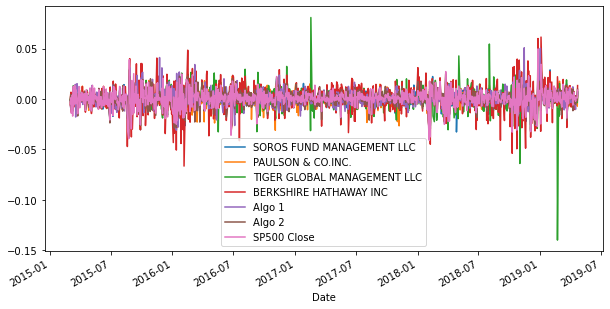

In [16]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (10,5))

#### Calculate and Plot cumulative returns.

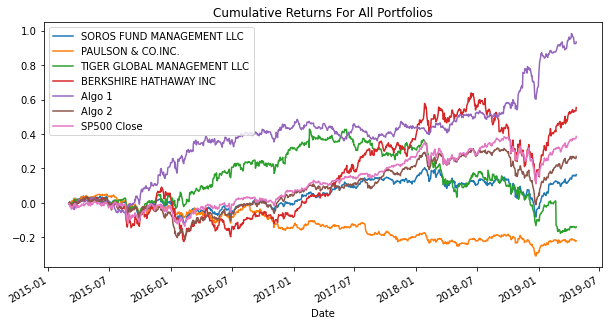

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_combined = (1 + combined_returns).cumprod() - 1 
# cumulative_returns = .cumprod() function
# Plot cumulative returns
cumulative_combined.plot(figsize = (10,5), title = "Cumulative Returns For All Portfolios");

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


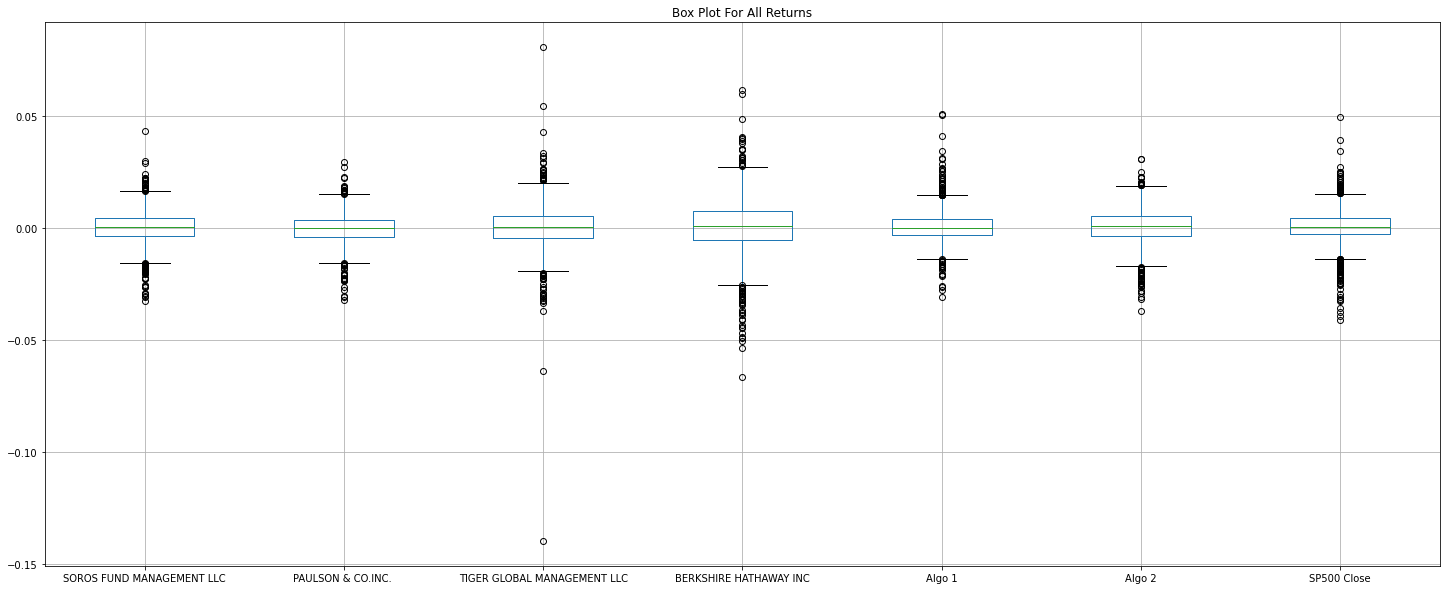

In [18]:
# Box plot to visually show risk
combined_returns.plot.box(figsize = (25,10), grid = True, title = "Box Plot For All Returns");

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_returns.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Close                    0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily.std()
# Determine which portfolios are riskier than the S&P 500
combined_daily_std.sort_values(ascending = True)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
SP500 Close                    0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

##### Any number higher then the S&P 500 would be considered riskier. In this case it would be Tiger Global and Berkshire Hathaway

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_combined_std = combined_daily_std * np.sqrt(252)
annual_combined_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Close                    0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

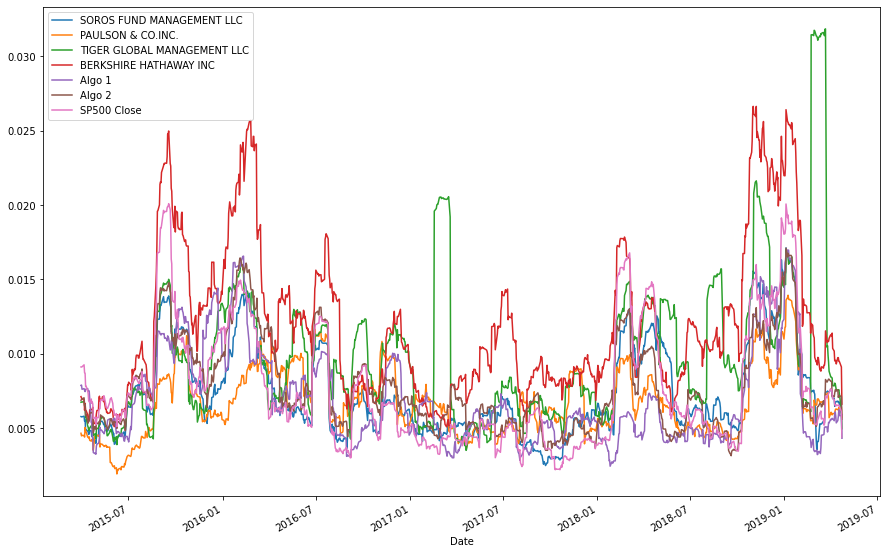

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_returns.rolling(window = 21).std().plot(figsize = (15,10));

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

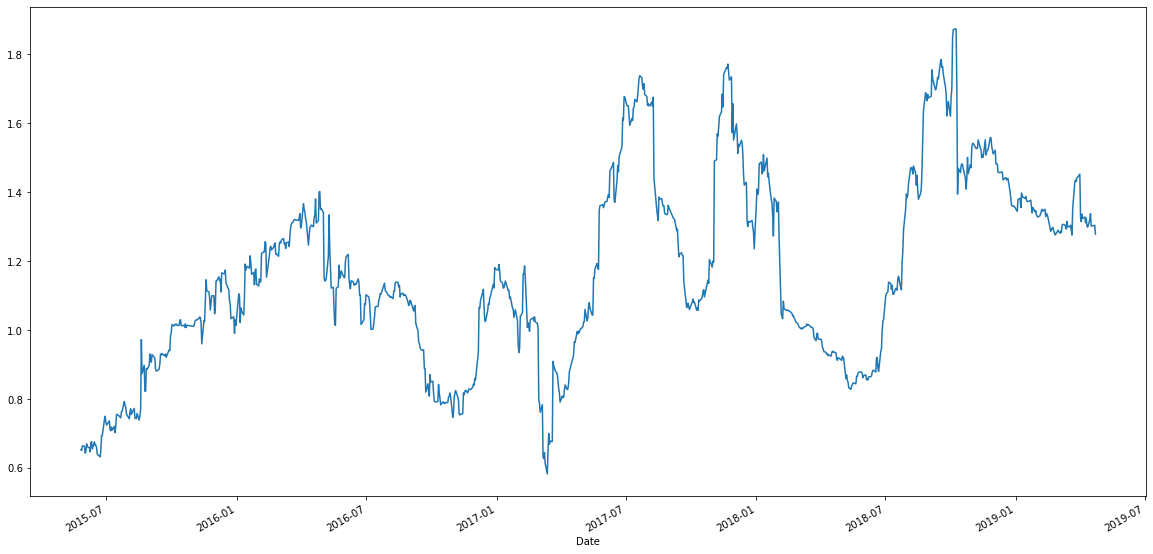

In [24]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(combined_returns['SP500 Close'])
# Calculate variance of S&P 500
rolling_variance = combined_returns['SP500 Close'].rolling(window = 60).var()
# Computing beta
berkshire_beta = rolling_covariance / rolling_variance
# Plot beta trend
# 60 day rolling beta
berkshire_beta.plot(figsize = (20,10));

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
combined_returns['BERKSHIRE HATHAWAY INC'].ewm(halflife = '21 days', times=pd.DatetimeIndex(combined_returns['BERKSHIRE HATHAWAY INC'])).mean()

Date
2015-03-03   -0.006569
2015-03-04   -0.001178
2015-03-05    0.001457
2015-03-06   -0.002182
2015-03-09   -0.002076
                ...   
2019-04-16    0.000491
2019-04-17    0.000494
2019-04-18    0.000495
2019-04-22    0.000494
2019-04-23    0.000506
Name: BERKSHIRE HATHAWAY INC, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean()*252) / (combined_returns.std() *np.sqrt(252))

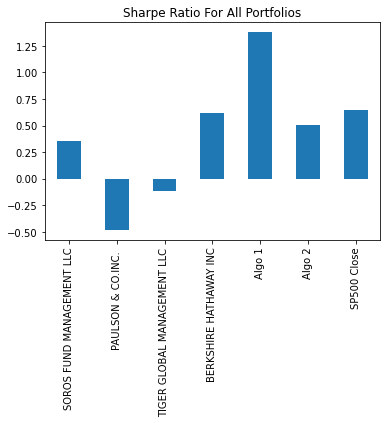

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios =sharpe_ratios.plot.bar(title = 'Sharpe Ratio For All Portfolios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

--- Yes, Algo 1 performs better then all portfolios given the risk, while Algo 2 outpeforms all except maybe Berkshire Hathaway!

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
goog_path = Path("../Starter_Code/Resources/goog_historical.csv")
goog_returns = pd.read_csv(goog_path, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
goog_returns.sort_index(inplace = True)
goog_returns.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [29]:
# Reading data from 2nd stock
aapl_path = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_returns = pd.read_csv(aapl_path, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
aapl_returns.sort_index(inplace = True)
aapl_returns.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [30]:
# Reading data from 3rd stock
cost_path = Path("../Starter_Code/Resources/cost_historical.csv")
cost_returns = pd.read_csv(cost_path, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True)
cost_returns.sort_index(inplace = True)
cost_returns.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [31]:
# Combine all stocks in a single DataFrame
second_combined = pd.concat([goog_returns, aapl_returns, cost_returns], axis = 'columns', join = 'inner')
second_combined

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [32]:
# Reset Date index
# I believe I reset the Date index in previous step!

In [33]:
# Reorganize portfolio data by having a column per symbol
del second_combined['Symbol']
second_combined.columns = ['GOOG', 'AAPL', 'COST']
second_combined

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


In [34]:
# Calculate daily returns
second_combined_daily = second_combined.pct_change()
# Drop NAs
second_combined_daily.dropna(inplace = True)
# Display sample data
second_combined_daily

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206
...,...,...,...
2019-05-03,0.019602,0.012431,0.007953
2019-05-06,0.003366,-0.015443,-0.001594
2019-05-07,-0.012855,-0.026957,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = second_combined_daily.dot(weights)
# Display sample data
portfolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
total_returns = pd.concat([portfolio_return, combined_returns], axis = 'columns')
total_returns.head()

,0,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Close
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [37]:
total_returns.columns = ['My Port', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO', 'TIGER GLOBAL', 'BERKSHIRE HATHAWAY',
                        'ALGO 1', 'ALGO 2', 'SP500 Close']
total_returns

,My Port,SOROS FUND MANAGEMENT LLC,PAULSON & CO,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,SP500 Close
2015-03-03,NaN,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,NaN,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,NaN,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,NaN,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,NaN,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...,...
2019-05-03,0.013329,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,-0.004557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-07,-0.018798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08,-0.000547,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_returns.dropna(inplace= True)
total_returns

,My Port,SOROS FUND MANAGEMENT LLC,PAULSON & CO,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,SP500 Close
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
annualized_total_returns = total_returns.std() * np.sqrt(252)
annualized_total_returns

My Port                      0.211496
SOROS FUND MANAGEMENT LLC    0.146675
PAULSON & CO                 0.116732
TIGER GLOBAL                 0.232531
BERKSHIRE HATHAWAY           0.247155
ALGO 1                       0.133704
ALGO 2                       0.139556
SP500 Close                  0.152054
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

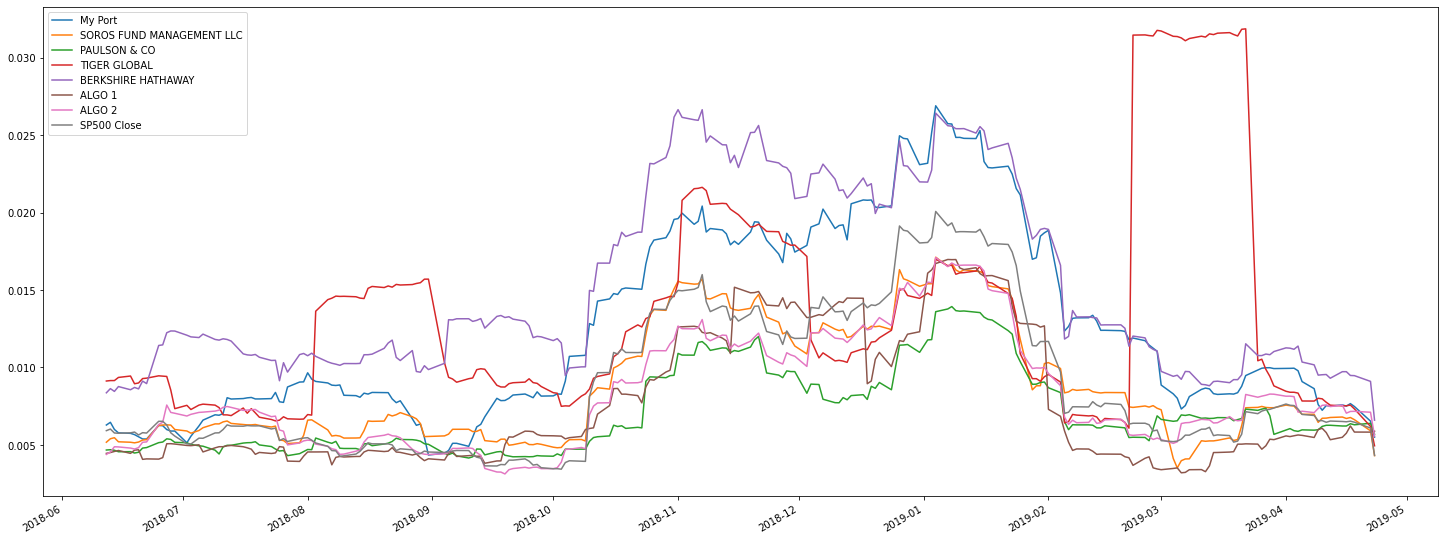

In [40]:
# Calculate rolling standard deviation
total_returns.rolling(window = 21).std()
# Plot rolling standard deviation
total_returns.rolling(window = 21).std().plot(figsize = (25,10))

### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
correlation_2 = total_returns.corr()
correlation_2

,My Port,SOROS FUND MANAGEMENT LLC,PAULSON & CO,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,SP500 Close
My Port,1.000000,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875
SOROS FUND MANAGEMENT LLC,0.733250,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981
PAULSON & CO,0.644210,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680
TIGER GLOBAL,0.391972,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030
BERKSHIRE HATHAWAY,0.801158,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303
ALGO 1,0.261471,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358
ALGO 2,0.739936,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721
SP500 Close,0.871875,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

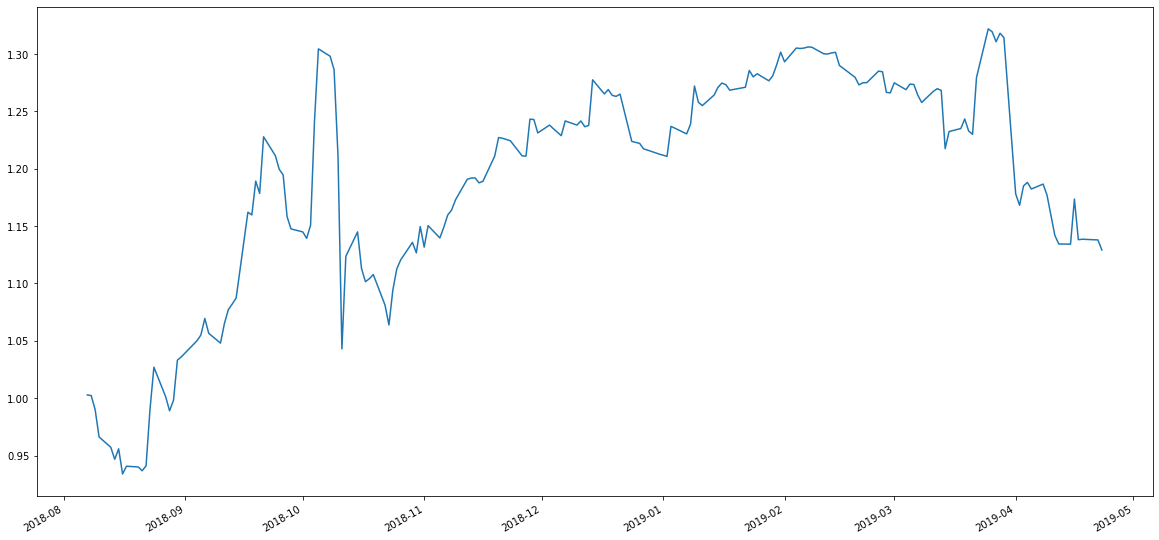

In [42]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
rolling_covariance_2 = total_returns['My Port'].rolling(window = 60).cov(total_returns['SP500 Close'])
# Calculate variance of S&P 500
rolling_variance_2 = total_returns['SP500 Close'].rolling(window = 60).var()
# Computing beta
my_beta = rolling_covariance_2 / rolling_variance_2
# Plot beta trend
# 60 day rolling beta
my_beta.plot(figsize = (20,10));

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_2 = (total_returns.mean()*252) / (total_returns.std() *np.sqrt(252))

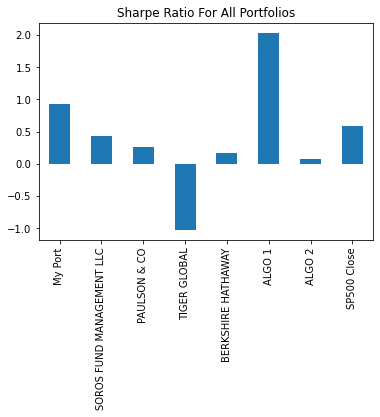

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_2 =sharpe_ratios_2.plot.bar(title = 'Sharpe Ratio For All Portfolios')

### How does your portfolio do?

Write your answer here!

### My Portfolio did better then most portfolios with the exception of ALGO 1. Side note
### is that this only accounts for the past trading year!